# 1. Gathering 

In [1]:
#Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import requests
import tweepy
import re
import json
import datetime
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
#Reading twitter archive csv file 
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#Downloading programmatically and reading Image Predictions tsv File
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = url.split('/')[-1]
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

In [3]:
Image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
#Querying Twitter and reading the returned file
# create the api object
consumer_key = '*****************'
consumer_secret = '*************************'
access_token = '****************************'
access_secret = '********************************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
#Test API with one tweet status
exp_tweet = api.get_status(archive_df['tweet_id'][1000], tweet_mode = 'extended')
content = exp_tweet._json
content


{'created_at': 'Wed Jun 29 01:23:16 +0000 2016',
 'id': 747963614829678593,
 'id_str': '747963614829678593',
 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q',
 'truncated': False,
 'display_text_range': [0, 70],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 747963600220917761,
    'id_str': '747963600220917761',
    'indices': [71, 94],
    'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'url': 'https://t.co/ZPfeRtOX0Q',
    'display_url': 'pic.twitter.com/ZPfeRtOX0Q',
    'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 937, 'h': 632, 'resize': 'fit'},
     'small': {'w': 680, 'h': 459, 'resize': 'fit'},
     'large': {'w': 937, 'h': 632, '

In [7]:
# Creating a file for the tweets' text data
errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in archive_df['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)

Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 873697596434513921;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872668790621863937;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872261713294495745;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 869988702071779329;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 866816280283807744;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 861769973181624320;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 856602993587888130;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 851953902622658560;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 845459076796616705;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 844704788403

In [5]:
df_list=[]

with open("tweet_json.txt", mode= 'r') as file:
    
    for line in file:
        tweet=json.loads(line)
        df_list.append(tweet)
       

In [6]:
api_df = pd.DataFrame(df_list)
api_df = api_df[['id' , 'retweet_count' , 'favorite_count']]


# 2. Assessing

### - Visual assessing

In [7]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
Image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
api_df

,id,retweet_count,favorite_count
0,892420643555336193,7430,35231
1,892177421306343426,5525,30496
2,891815181378084864,3647,22934
3,891689557279858688,7607,38517
4,891327558926688256,8189,36790
5,891087950875897856,2744,18547
6,890971913173991426,1779,10792
7,890729181411237888,16614,59325
8,890609185150312448,3794,25536
9,890240255349198849,6432,29125


### - Programmatic assessment

In [53]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [29]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [30]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [32]:
api_df.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2609.778207,7360.093951
std,6.823170e+16,4415.637664,11430.223055
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,528.500000,1279.000000
50%,7.182469e+17,1219.000000,3195.000000
75%,7.986692e+17,3029.000000,9008.000000
max,8.924206e+17,74997.000000,151729.000000


In [33]:
Image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [35]:
all_columns = pd.Series(list(archive_df) + list(api_df) + list(Image_predictions_df))
all_columns[all_columns.duplicated()]

20    tweet_id
dtype: object

### Outputs (Assessment Summary):

#### Quality aspects:

##### archive_df:
completeness issues: 
- No need for the tweets without images.
- No need for the retweeted tweets or replies. 

Data types (consistency issues):
- Time_stamp is object type instead of date type.
- Tweets' ids are ints which is appropriate for space-saving and for performance reasons while it's being dealt with as a string (not doing any mathematical operations on them).
- Representations of null values as string “none”.
- Non useful coulmns such as retweeted_status_timestamp and retweeted_status_id after filtering..etc.

Accuracy issues:
- Weird names like (a, an, the) which is an extracting whatever comes after "this is" error.
- Weird ratings values with illogical five number summary.

##### Api_df:
completeness issues: 
- The total number of records.

##### image_predictions:
completeness issues: 
- The total number of records.

Accuracy issues:
- Columns' names are vague.
- Capitalization of breeds' names.

#### Tidiness aspects:

##### archive_df :
- Values (doggo, floofer, pupper, puppo) are column names.

##### image_predictions :
- Values (p1, p2, p3) are column names.

#####  Api_df:
- Not an observational unit of its own, need to be merged with archive data frame.

# 3. Cleaning

In [334]:
# Copying datasets
archive_clean = archive_df.copy()
image_clean = Image_predictions_df.copy()
api_clean = api_df.copy()

### Define

- Use the image_prediction table to guide the selection and removal of tweets without photos in the archive table (archive_df).


### code

In [335]:
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_image = list(image_clean.tweet_id.unique())

# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == archive_clean.tweet_id.isin(tweets_with_image).sum()

True

In [336]:
# Cleaning in action
archive_clean = archive_clean[archive_clean.tweet_id.isin(tweets_with_image)]

### Test

In [337]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
dtypes: float64(4), int64(3), objec

### Define

- In the follwing part, the following redundant columns (in_reply_to_status_id, in_reply_to_user_id, 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') will be utilized to shed the retweet and replies from our datasets and then will be dropped (archive_df).

### code

In [338]:
# Check which cells are NaN
# Use `all` along the first axis to only select NaNs for all cloumns
archive_clean = archive_clean[archive_clean[['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].isna().all(axis=1)]

### Test

In [339]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
dtypes: float64(4), int64(3), object(10)

### Define
- Remove unnecessary columns (archive_df).
- Change timestamp to date type (archive_df).
- Change none vlues to NaN (archive_df).

### code

In [340]:
# Remove unnecessary columns
unnecessary_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
archive_clean = archive_clean.drop(columns=unnecessary_columns)

# Change timestamp to date type
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

# Change none vaues to empty strings except the name to NaN
archive_clean['name'] = archive_clean['name'].replace('None', np.NaN)
archive_clean['doggo'] = archive_clean['doggo'].replace('None', "")
archive_clean['floofer'] = archive_clean['floofer'].replace('None', "")
archive_clean['pupper'] = archive_clean['pupper'].replace('None', "")
archive_clean['puppo'] = archive_clean['puppo'].replace('None', "")


### Test

In [341]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1447 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 200.2+ KB


### Define
- Replace weird names like (a, an, the) with empty strings (archive_df).
- Replace weird ratings values with illogical five number summary to reasonable rating (archive_df).

### code

In [342]:
#Replacing weird names
archive_clean['name'] = archive_clean['name'].replace('a', np.NaN)
archive_clean['name'] = archive_clean['name'].replace('an', np.NaN)
archive_clean['name'] = archive_clean['name'].replace('the', np.NaN)


In [343]:
# Calculating the dogs counts in the tweets featuring many dogs
dog_count = archive_clean.rating_denominator[archive_clean.rating_numerator >= 40 ]/10
# Check the dog_count with their indices:
print(dog_count)

433      7.0
695      1.0
902     15.0
979      1.0
1120    17.0
1202     5.0
1228     9.0
1254     8.0
1274     5.0
1351     5.0
1433     4.0
1635    11.0
1779    12.0
1843     8.0
2074     1.0
Name: rating_denominator, dtype: float64


In [344]:
# Performing the Calculations
archive_clean.loc[archive_clean.rating_numerator >= 40, ['rating_numerator', 'rating_denominator']] = [archive_clean.rating_numerator[archive_clean.rating_numerator >= 40]/dogs_count , 10] 


In [345]:
# Performing the Calculations for numerator > 15
archive_clean.loc[archive_clean.rating_numerator >= 15, ['rating_numerator', 'rating_denominator']] = [np.NaN, 10]

In [346]:
# Performing the Calculations for denominator not euqal to 10
archive_clean.loc[archive_clean.rating_denominator != 10, ['rating_numerator', 'rating_denominator']] = [np.NaN,np.NaN]

### Test

In [347]:
archive_clean.loc[archive_clean.rating_denominator != 10, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1068,NaN,NaN
1165,NaN,NaN
1662,NaN,NaN
2335,NaN,NaN


In [348]:
archive_clean.loc[archive_clean.rating_numerator >= 15, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator


In [349]:
archive_clean.rating_denominator.value_counts()

10.0    1967
Name: rating_denominator, dtype: int64

In [350]:
archive_clean.rating_numerator.value_counts()

12.0    450
10.0    419
11.0    397
13.0    253
9.0     150
8.0      95
7.0      51
5.0      33
14.0     33
6.0      32
3.0      19
4.0      15
2.0       9
1.0       4
0.0       1
Name: rating_numerator, dtype: int64

### Define

- Match the total number of records (api_df) to the archive.


### code

In [351]:
# Dropping retweets and replies from api clean data frame
api_clean = api_clean[~np.logical_not(api_clean.id.isin(list(archive_clean.tweet_id)))]

### Test

In [352]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2330
Data columns (total 3 columns):
id                1964 non-null int64
retweet_count     1964 non-null int64
favorite_count    1964 non-null int64
dtypes: int64(3)
memory usage: 61.4 KB


### Define

- Match the total number of records (Image_prediction_df) to the archive.


### code

In [353]:
# Dropping retweets and replies from image prediction clean data frame
image_clean = image_clean[~np.logical_not(image_clean.tweet_id.isin(list(archive_clean.tweet_id)))]

### Test

In [354]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    1971 non-null int64
jpg_url     1971 non-null object
img_num     1971 non-null int64
p1          1971 non-null object
p1_conf     1971 non-null float64
p1_dog      1971 non-null bool
p2          1971 non-null object
p2_conf     1971 non-null float64
p2_dog      1971 non-null bool
p3          1971 non-null object
p3_conf     1971 non-null float64
p3_dog      1971 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


### Define
- Make Columns' names understanable (image_df).
- Lower all breeds' names letters (image_df).

### code

In [355]:
# Make Columns' names understanable
image_clean = image_clean.rename(columns={'p1': 'prediction_1st',
                                          'p1_conf': 'prediction-confidence_1st',
                                          'p1_dog': 'prediction-dog_1st',
                                          'p2': 'prediction_2nd',
                                          'p2_conf': 'prediction-confidence_2nd',
                                          'p2_dog': 'prediction-dog_2nd',
                                          'p3': 'prediction_3rd',
                                          'p3_conf': 'prediction-confidence_3rd',
                                          'p3_dog': 'prediction-dog_3rd'})

In [356]:
# Lower all breeds' names letters
image_clean['prediction_1st'] = image_clean['prediction_1st'].str.lower()
image_clean['prediction_2nd'] = image_clean['prediction_2nd'].str.lower()
image_clean['prediction_3rd'] = image_clean['prediction_3rd'].str.lower()

### Test

In [357]:
image_clean.head()

,tweet_id,jpg_url,img_num,prediction_1st,prediction-confidence_1st,prediction-dog_1st,prediction_2nd,prediction-confidence_2nd,prediction-dog_2nd,prediction_3rd,prediction-confidence_3rd,prediction-dog_3rd
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Define
- Replace Columns (doggo, floofer, pupper, puppo) with dog_breed (archive_df).

### code

In [358]:
# add the four columns using summation
archive_clean['dog_breed'] = archive_clean['doggo'] + archive_clean['puppo'] + archive_clean['floofer'] + archive_clean['pupper']

In [359]:
# Remove unnecessary dog columns
unnecessary_dog_columns = ['doggo', 'puppo', 'floofer', 'pupper']
archive_clean = archive_clean.drop(columns=unnecessary_dog_columns)

In [360]:
# rows that contain multiple stages and add separator between the stages
archive_clean.loc[archive_clean.dog_breed == 'doggopupper', 'dog_breed'] = 'doggo-pupper'
archive_clean.loc[archive_clean.dog_breed == 'doggopuppo', 'dog_breed'] = 'doggo-puppo'
archive_clean.loc[archive_clean.dog_breed == 'doggofloofer', 'dog_breed'] = 'doggo-floofer'
archive_clean['dog_breed'] = archive_clean['dog_breed'].replace("", np.NaN)


### Test

In [361]:
archive_clean.dog_breed.value_counts()

pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-puppo        1
doggo-floofer      1
Name: dog_breed, dtype: int64

In [362]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed
1911,674410619106390016,2015-12-09 02:09:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He wants to be a sprinkler. 10/...,https://twitter.com/dog_rates/status/674410619...,10.0,10.0,Lenny,NaN
866,762035686371364864,2016-08-06 21:20:40,"<a href=""http://twitter.com/download/iphone"" r...",This left me speechless. 14/10 heckin heroic a...,https://twitter.com/dog_rates/status/762035686...,14.0,10.0,NaN,NaN
965,750429297815552001,2016-07-05 20:41:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnie. He's a Nova Scotian Fridge Floo...,https://twitter.com/dog_rates/status/750429297...,12.0,10.0,Arnie,NaN
1081,738885046782832640,2016-06-04 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's a Nova Scotian Towel Pou...,https://twitter.com/dog_rates/status/738885046...,11.0,10.0,Charles,NaN
1116,732585889486888962,2016-05-17 14:57:41,"<a href=""http://twitter.com/download/iphone"" r...","When your teacher agreed on 10,000 RTs and no ...",https://twitter.com/dog_rates/status/732585889...,10.0,10.0,NaN,NaN


### Define
- Solving column headers are values, not variable names (image_prediction). -  the row count will be tripled-

### code

In [367]:
image_Clean2 = pd.wide_to_long(image_clean, stubnames= ["prediction","prediction-confidence","prediction-dog"], i= "tweet_id", j= 'prediction_number', sep='_', suffix=r'\w+' )

### Test

In [370]:
image_Clean2

,,img_num,jpg_url,prediction,prediction-confidence,prediction-dog
tweet_id,prediction_number,,,,,
666020888022790149,1st,1,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,0.465074,True
666029285002620928,1st,1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True
666033412701032449,1st,1,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461,True
666044226329800704,1st,1,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143,True
666049248165822465,1st,1,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True
666050758794694657,1st,1,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,bernese_mountain_dog,0.651137,True
666051853826850816,1st,1,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,box_turtle,0.933012,False
666055525042405380,1st,1,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517,True
666057090499244032,1st,1,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,shopping_cart,0.962465,False


### Define 
- Merging api_clean with archive clean as it is not an observational unit of its own.

### code

In [374]:
api_clean = api_clean.rename(columns={'id': 'tweet_id'})

In [383]:
master_df = pd.merge(archive_clean, api_clean, on=['tweet_id'], how = 'left')


### Test

In [384]:
master_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,7430.0,35231.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,5525.0,30496.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,3647.0,22934.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,7607.0,38517.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,8189.0,36790.0
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,2744.0,18547.0
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,1779.0,10792.0
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,16614.0,59325.0
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,3794.0,25536.0
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,6432.0,29125.0


In [386]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1967 non-null float64
name                  1379 non-null object
dog_breed             303 non-null object
retweet_count         1964 non-null float64
favorite_count        1964 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 184.8+ KB


In [388]:
master_df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.971000e+03,1961.000000,1967.0,1964.000000,1964.000000
mean,7.360418e+17,10.541050,10.0,2385.680754,8103.215886
std,6.752810e+16,2.169471,0.0,4263.820211,11917.812123
min,6.660209e+17,0.000000,10.0,11.000000,69.000000
25%,6.758656e+17,10.000000,10.0,531.000000,1738.250000
50%,7.088343e+17,11.000000,10.0,1156.000000,3657.000000
75%,7.880951e+17,12.000000,10.0,2721.250000,10104.750000
max,8.924206e+17,14.000000,10.0,74997.000000,151729.000000


# 4. Storing

In [389]:
master_df.to_csv('twitter_archive_master.csv', index=False)

In [395]:
image_Clean2.to_csv('twitter_image_prediction_master.csv')

# 5. Analyze & Visualize

In [396]:
twitter_archive_master_df = pd.read_csv('twitter_archive_master.csv')
twitter_image_prediction_master_df = pd.read_csv('twitter_image_prediction_master.csv')

In [399]:
twitter_archive_master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,7430.0,35231.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,5525.0,30496.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,3647.0,22934.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,7607.0,38517.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,8189.0,36790.0


In [400]:
twitter_image_prediction_master_df.head()

,tweet_id,prediction_number,img_num,jpg_url,prediction,prediction-confidence,prediction-dog
0,666020888022790149,1st,1,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,0.465074,True
1,666029285002620928,1st,1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True
2,666033412701032449,1st,1,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461,True
3,666044226329800704,1st,1,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143,True
4,666049248165822465,1st,1,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True


# 6. Insights

###### Retweet count and favorite count for tweets featuring dogs and those not featuring dogs

In [430]:
# tweets without dogs are almost all tweets with rating numerator below 10
# grouping by this condition
bin_edges = [0,9,50]
bin_names = ["Flase", "True"]
twitter_archive_master_df['dog'] = pd.cut(twitter_archive_master_df['rating_numerator'], bin_edges, labels= bin_names)

In [431]:
twitter_archive_master_df.groupby(['dog']).retweet_count.describe()


,count,mean,std,min,25%,50%,75%,max
dog,,,,,,,,
Flase,408.0,822.955882,934.700406,18.0,285.75,596.5,992.5,8695.0
True,1545.0,2781.038835,4675.233295,11.0,656.00,1480.0,3194.0,74997.0


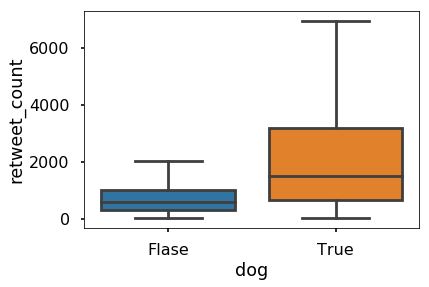

In [434]:
sns.set_context('poster')
ax = sns.boxplot(x='dog', y='retweet_count',data =twitter_archive_master_df, showfliers=False )
plt.savefig('box_plot_retweet_count_dogs_not_dogs.png')

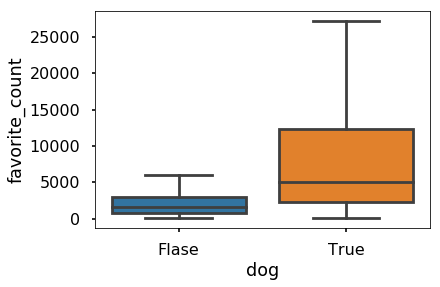

In [433]:
twitter_archive_master_df.groupby(['dog']).favorite_count.describe()
sns.set_context('poster')
ax = sns.boxplot(x='dog', y='favorite_count',data =twitter_archive_master_df, showfliers=False )
plt.savefig('box_plot_favorite_count_dogs_not_dogs.png')

###### Retweet count and favorite count for tweets according to dog breeds

In [488]:
twitter_archive_master_df.groupby(['dog_breed']).retweet_count.describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
doggo,62.0,6308.370968,12406.151008,607.0,1708.25,2710.5,4522.5,74997.0
doggo-floofer,1.0,2949.000000,NaN,2949.0,2949.00,2949.0,2949.0,2949.0
doggo-pupper,8.0,3929.125000,5082.633272,1068.0,2023.75,2197.0,2718.5,16432.0
doggo-puppo,1.0,16860.000000,NaN,16860.0,16860.00,16860.0,16860.0,16860.0
floofer,7.0,4195.857143,5152.618733,421.0,1579.00,2779.0,3758.0,15497.0
pupper,201.0,2035.666667,3211.607993,81.0,588.00,1049.0,2120.0,31879.0
puppo,22.0,5619.545455,9027.548957,593.0,1432.50,2651.5,5329.0,42191.0


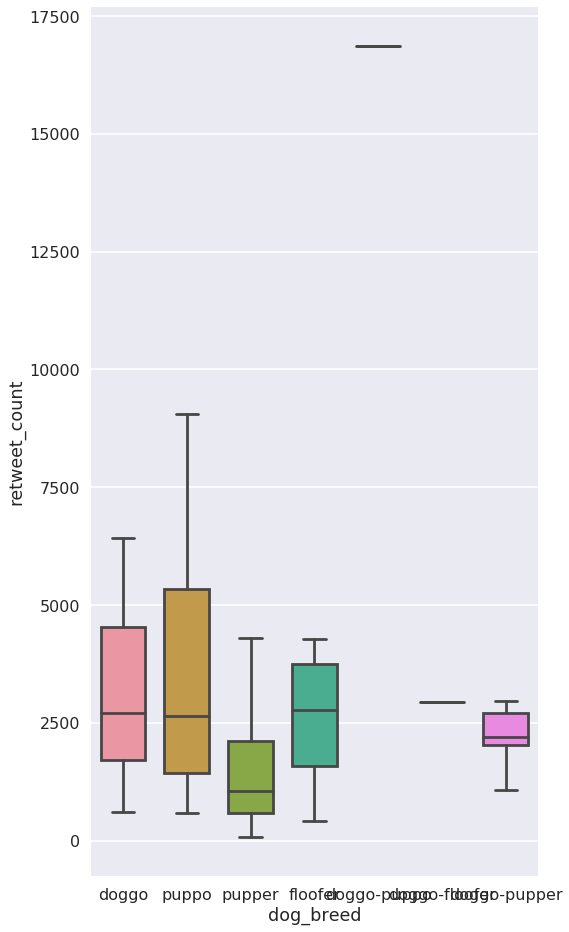

In [491]:
sns.set_context('poster')
ax = sns.boxplot(x='dog_breed', y='retweet_count',data =twitter_archive_master_df, showfliers=False, width= .7 )
sns.set(rc={'figure.figsize':(8,16)})
plt.savefig('dog_breed_retweet_count.png')

In [489]:
twitter_archive_master_df.groupby(['dog_breed']).favorite_count.describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
doggo,62.0,18379.467742,25183.616854,2261.0,7297.00,10881.0,17952.50,151729.0
doggo-floofer,1.0,15472.000000,NaN,15472.0,15472.00,15472.0,15472.00,15472.0
doggo-pupper,8.0,13276.375000,15642.084753,4286.0,7296.75,8378.0,9593.25,51679.0
doggo-puppo,1.0,43440.000000,NaN,43440.0,43440.00,43440.0,43440.00,43440.0
floofer,7.0,11724.857143,9996.505947,2013.0,4454.50,9907.0,15916.50,29412.0
pupper,201.0,6534.825871,10477.525542,609.0,2143.00,2895.0,6929.00,113442.0
puppo,22.0,20397.045455,27745.717031,2884.0,6201.00,12035.0,17674.50,129477.0


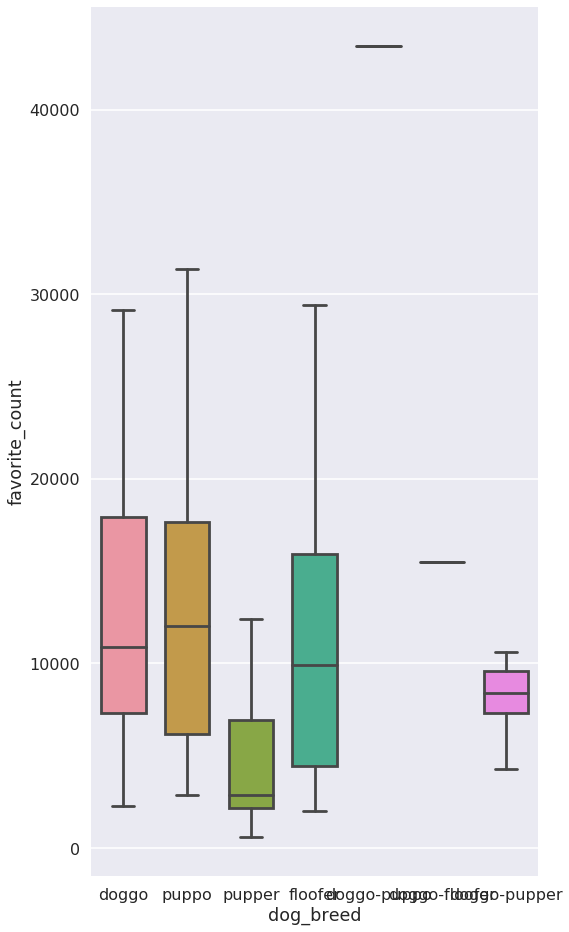

In [490]:
sns.set_context('poster')
ax = sns.boxplot(x='dog_breed', y='favorite_count',data =twitter_archive_master_df, showfliers=False, width= .7 )
sns.set(rc={'figure.figsize':(8,16)})
plt.savefig('dog_breed_favorite_count.png')

###### Most tweeted about according to dog breeds

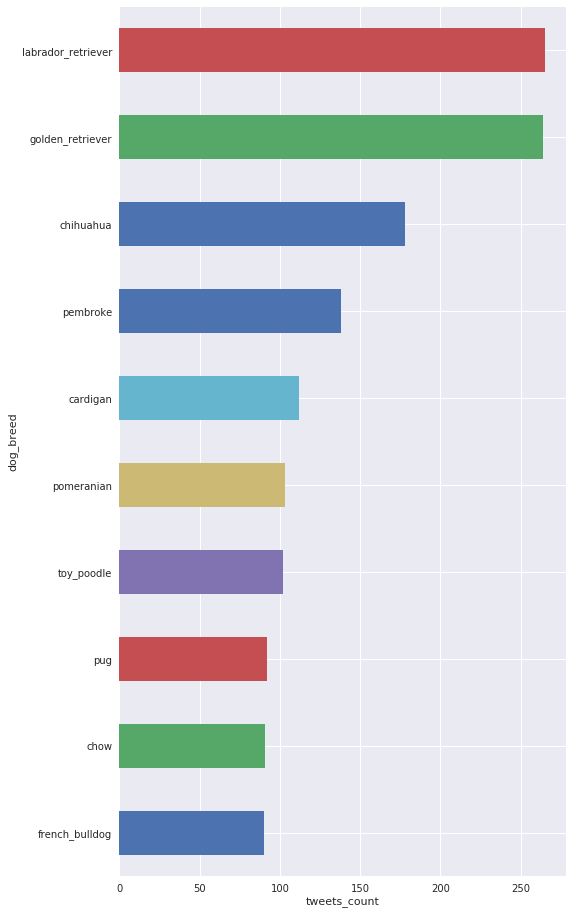

In [509]:
twitter_image_prediction_master_df[twitter_image_prediction_master_df['prediction-dog'] == True].prediction.value_counts()[9::-1].plot(kind='barh')
plt.xlabel('tweets_count')
plt.ylabel('dog_breed');
plt.savefig('Top_breeds_distribution.png')

###### Avarage monthly retweet count

In [541]:
twitter_archive_master_df['timestamp'] = pd.to_datetime(twitter_archive_master_df['timestamp'])
twitter_archive_master_df['month'] = twitter_archive_master_df['timestamp'].dt.month
twitter_archive_master_df['month_year'] = pd.to_datetime(twitter_archive_master_df['timestamp']).dt.to_period('M')

In [547]:
twitter_archive_master_df.groupby(['month_year']).retweet_count.mean()

month_year
2015-11     470.033898
2015-12    1277.267409
2016-01    1304.668675
2016-02    1390.703704
2016-03    1403.161017
2016-04    1375.240741
2016-05    1900.839286
2016-06    3809.291139
2016-07    2146.114943
2016-08    3116.355932
2016-09    3105.080645
2016-10    3622.630769
2016-11    4172.346154
2016-12    4738.555556
2017-01    5484.696970
2017-02    3691.523810
2017-03    3986.911111
2017-04    5035.225000
2017-05    6739.714286
2017-06    5624.000000
2017-07    5911.265306
2017-08    6477.500000
Freq: M, Name: retweet_count, dtype: float64

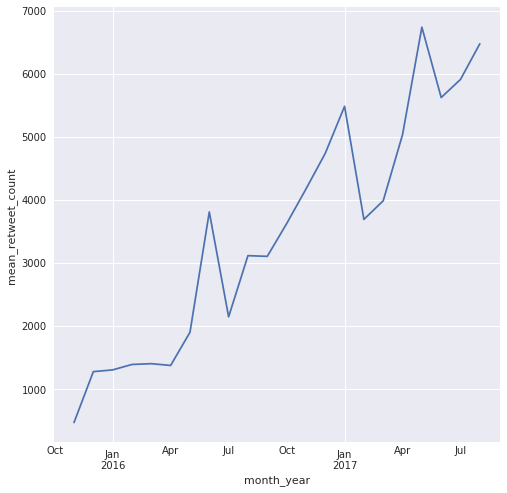

In [552]:
twitter_archive_master_df.groupby(['month_year']).retweet_count.mean().plot(kind='line', figsize=(8,8))
plt.xlabel('month_year')
plt.ylabel('mean_retweet_count');
plt.savefig('mean_retweet_over_time.png')

In [555]:
######  monthly tweets count

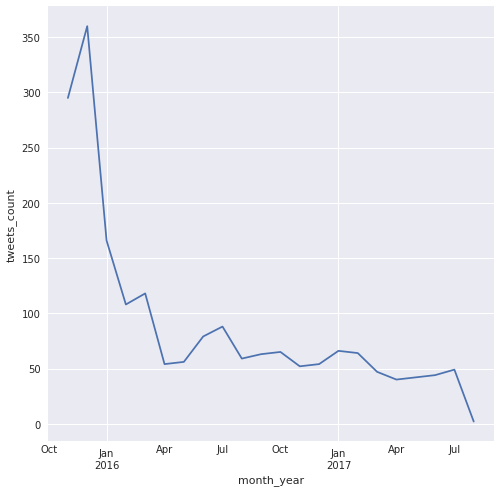

In [554]:
twitter_archive_master_df.groupby(['month_year']).tweet_id.count().plot(kind='line', figsize=(8,8))
plt.xlabel('month_year')
plt.ylabel('tweets_count');
plt.savefig('tweets_count_over_time.png')

###### most predicted breed for each prediction level.

In [571]:
twitter_image_prediction_master_df[twitter_image_prediction_master_df['prediction-dog'] == True].groupby(['prediction_number']).prediction.value_counts()[0:-1:10]

prediction_number  prediction                 
1st                golden_retriever               137
                   cocker_spaniel                  27
                   beagle                          17
                   basset                          13
                   boxer                           10
                   doberman                         8
                   norwegian_elkhound               7
                   lhasa                            5
                   rhodesian_ridgeback              4
                   greater_swiss_mountain_dog       3
                   giant_schnauzer                  2
                   standard_schnauzer               1
2nd                cocker_spaniel                  32
                   chow                            20
                   shih-tzu                        16
                   black-and-tan_coonhound         12
                   groenendael                     10
                   german_short-hai

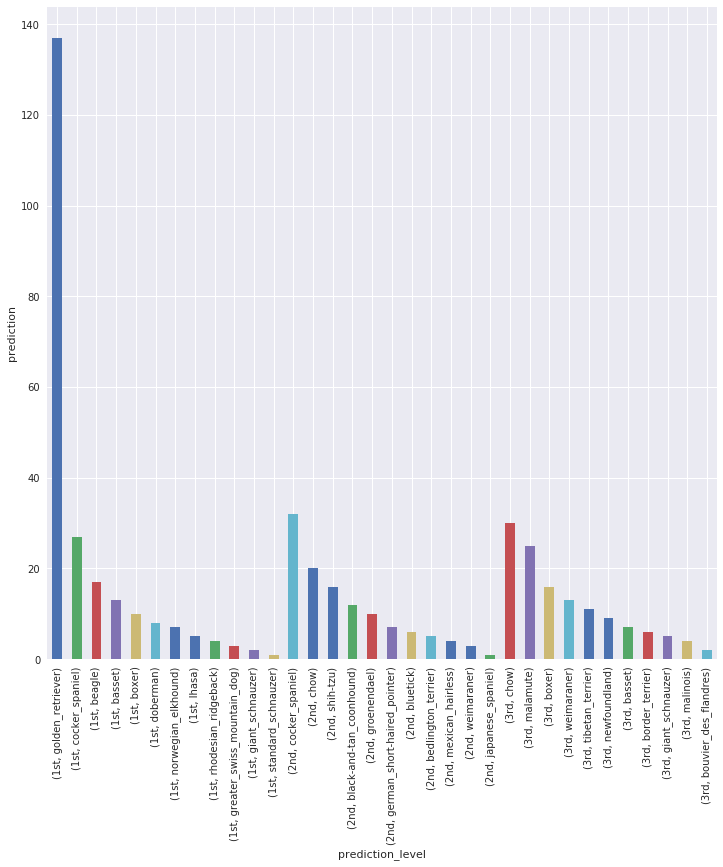

In [580]:
twitter_image_prediction_master_df[twitter_image_prediction_master_df['prediction-dog'] == True].groupby(['prediction_number']).prediction.value_counts()[0:-1:10].plot(kind='bar', figsize=(12,12))
plt.xlabel('prediction_level')
plt.ylabel('prediction');
plt.savefig('most_breed_each_prediction_level.png')